In [1]:
# Import dependencies and file
# The dataset was obtained from CryptoCompare.
import numpy as np
import pandas as pd
from pathlib import Path
file_path = Path("crypto_data.csv")


In [2]:
# Read csv file in to dataframe
crypto_df = pd.read_csv(file_path)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [6]:
# Rename Unnamed column
crypto_df.rename(columns={'Unnamed: 0': 'CryptoID'}, inplace=True)
crypto_df.head()

,CryptoID,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [7]:
# Filter for currencies that are currently being traded
crypto_df = crypto_df[crypto_df["IsTrading"] == True]
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryptoID         1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 63.7+ KB


In [8]:
# Drop the IsTrading column from the dataframe
crypto_df.drop(['IsTrading'], axis=1, inplace=True)
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryptoID         1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   ProofType        1144 non-null   object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  1144 non-null   object 
dtypes: float64(1), object(5)
memory usage: 62.6+ KB


In [10]:
# Remove all rows that have at least one null value
crypto_df = crypto_df.dropna()
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryptoID         685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   ProofType        685 non-null    object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.5+ KB


In [11]:
# Filter for cryptocurrencies that have total coins mined 'greater than zero'
crypto_df = crypto_df[crypto_df["TotalCoinsMined"] > 0]
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryptoID         532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   ProofType        532 non-null    object 
 4   TotalCoinsMined  532 non-null    float64
 5   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(5)
memory usage: 29.1+ KB


In [12]:
# Data should be numeric, delete the CoinName from the original dataframe
crypto_data_df = crypto_df[["CryptoID","Algorithm","ProofType","TotalCoinsMined","TotalCoinSupply"]].copy()
crypto_data_df.head()

,CryptoID,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [13]:
crypto_data_df=crypto_data_df.set_index("CryptoID")
crypto_data_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
CryptoID,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [15]:
# View unique values in Algorithm column
crypto_data_df['Algorithm'].unique()


array(['Scrypt', 'X13', 'SHA-256', 'Ethash', 'X11', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'Quark', 'Groestl',
       'PoS', 'NeoScrypt', 'SHA3', 'HybridScryptHash256', 'PHI1612',
       'Lyra2REv2', 'CryptoNight', 'Shabal256', 'Counterparty',
       'Stanford Folding', 'QuBit', 'M7 POW', 'Lyra2RE', 'QUAIT',
       'Blake2b', 'BLAKE256', '1GB AES Pattern Search', 'NIST5', 'Dagger',
       'X11GOST', 'POS 3.0', 'SHA-256D', 'Lyra2Z', 'X14', 'DPoS',
       'Dagger-Hashimoto', 'Blake2S', '536', 'Argon2d', 'Cloverhash',
       'Skein', 'Time Travel', 'Keccak', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'C11',
       'SkunkHash', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'IMesh', 'Green Protocol',
       'Semux BFT consensus', 'X16R', 'Tribus', 'CryptoNight Heavy',
       'Jump Consistent Hash', 'HMQ1725', 'Cryptonight-GPU', 'ECC 256K1',
       'Blake', 'Exosis', 'Equihash+Scrypt', 'Le

In [16]:
# View unique values in ProofType column
crypto_data_df['ProofType'].unique()

array(['PoW/PoS', 'PoW', 'PoS', 'PoC', 'PoS/PoW/PoT', 'PoST', 'PoW/nPoS',
       'PoS/PoW', 'dPoW/PoW', 'PoW/PoW', 'DPoS', 'TPoS', 'PoW/PoS ',
       'Proof of Authority', 'PoW and PoS', 'POBh', 'PoW + Hive', 'PoA',
       'HPoW', 'Zero-Knowledge Proof', 'DPOS', 'Pos', 'Proof of Trust',
       'LPoS', 'PoS/LPoS'], dtype=object)

In [17]:
# Import Dependencies to convert categorical data, Algorithm and ProofType, into numerica data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Label encoding the 'Algorithm' column
crypto_data_df['Algorithm'] = LabelEncoder().fit_transform(crypto_data_df['Algorithm'])
crypto_data_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
CryptoID,,,,
42,52,PoW/PoS,4.199995e+01,42
404,52,PoW/PoS,1.055185e+09,532000000
1337,66,PoW/PoS,2.927942e+10,314159265359
BTC,47,PoW,1.792718e+07,21000000
ETH,20,PoW,1.076842e+08,0
LTC,52,PoW,6.303924e+07,84000000
DASH,64,PoW/PoS,9.031294e+06,22000000
XMR,12,PoW,1.720114e+07,0
ETC,20,PoW,1.133597e+08,210000000


In [18]:
# Label encoding the 'Algorithm' column
crypto_data_df['ProofType'] = LabelEncoder().fit_transform(crypto_data_df['ProofType'])
crypto_data_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
CryptoID,,,,
42,52,15,4.199995e+01,42
404,52,15,1.055185e+09,532000000
1337,66,15,2.927942e+10,314159265359
BTC,47,12,1.792718e+07,21000000
ETH,20,12,1.076842e+08,0
LTC,52,12,6.303924e+07,84000000
DASH,64,15,9.031294e+06,22000000
XMR,12,12,1.720114e+07,0
ETC,20,12,1.133597e+08,210000000


In [20]:
crypto_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    int64  
 1   ProofType        532 non-null    int64  
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 20.8+ KB


In [21]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crypto_data_df)
print(scaled_data[0:10])

[[ 3.76459118e-01  8.91356555e-01 -1.17108170e-01 -1.52870298e-01]
 [ 3.76459118e-01  8.91356555e-01 -9.39695522e-02 -1.45008997e-01]
 [ 1.21543803e+00  8.91356555e-01  5.24945609e-01  4.48942416e+00]
 [ 7.68237937e-02  1.67233875e-03 -1.16715055e-01 -1.52559984e-01]
 [-1.54120696e+00  1.67233875e-03 -1.14746818e-01 -1.52870298e-01]
 [ 3.76459118e-01  1.67233875e-03 -1.15725815e-01 -1.51629040e-01]
 [ 1.09558390e+00  8.91356555e-01 -1.16910129e-01 -1.52545207e-01]
 [-2.02062348e+00  1.67233875e-03 -1.16730976e-01 -1.52870298e-01]
 [-1.54120696e+00  1.67233875e-03 -1.14622363e-01 -1.49767153e-01]
 [-1.66106109e+00  1.67233875e-03 -1.16946272e-01 -1.52559984e-01]]


### Dimensionality Reduction
(1) Perform dimensionality reduction with PCA
(2) Run t-SNE on the principal components: the output of the PCA transformation
(3) Create a scatter plot of the t-SNE output

In [22]:
# Perform dimensionality reduction with PCA
from sklearn.decomposition import PCA

# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the data.
crypto_pca = pca.fit_transform(crypto_data_df)

In [24]:
# Transform PCA data to a DataFrame
crypto_data_df_pca = pd.DataFrame(
    data=crypto_pca, index=crypto_data_df.index, columns=["principal component 1", "principal component 2"]
)
crypto_data_df_pca.head()

,principal component 1,principal component 2
CryptoID,,
42,-1.162934e+10,-5.502574e+08
404,-1.064088e+10,-1.197852e+09
1337,2.750507e+11,1.312370e+11
BTC,-1.160219e+10,-5.552767e+08
ETH,-1.157548e+10,-6.435026e+08


In [25]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.87571706, 0.12428294])

### Sample Analysis
The explained variance in the above sample states that the first principal component contains approximately 88% of the vaiance
and the second principal component contains 12% of the variance. We have approximately 100% of the information in the 
original dataset.

In [26]:
# Initialize PCA model for 3 principal components
pca = PCA(n_components=3)

# Get 3 principal components for data.
crypto_pca = pca.fit_transform(crypto_data_df)

# Transform PCA data to a DataFrame
crypto_data_df_pca = pd.DataFrame(
    data=crypto_pca, index=crypto_data_df.index, columns=["principal component 1", "principal component 2", "principal component 3"]
)
crypto_data_df_pca.head()

,principal component 1,principal component 2,principal component 3
CryptoID,,,
42,-1.162934e+10,-5.502574e+08,-6.273406
404,-1.064088e+10,-1.197852e+09,-6.253883
1337,2.750507e+11,1.312370e+11,-28.183653
BTC,-1.160219e+10,-5.552767e+08,-1.163779
ETH,-1.157548e+10,-6.435026e+08,25.820528


In [27]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([8.75717060e-01, 1.24282940e-01, 4.15873646e-20])

In [29]:
# Run t-SNE on the principal components: the output of the PCA transformation
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate =250)
tsne_features = tsne.fit_transform(crypto_data_df_pca)

In [32]:
tsne_features.shape

(532, 2)

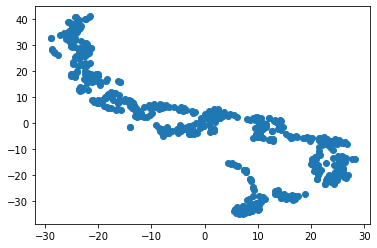

In [34]:
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

### Cluster Analysis with k-Means

In [36]:
from sklearn.cluster import KMeans

In [37]:
# Identify the best number of clusters using the elbow curve
inertia = []
k = list(range(1, 10))
# Same as k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_data_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,3.542739e+24
1,2,1.061346e+24
2,3,6.224534e+23
3,4,2.450600e+23
4,5,1.284591e+23
5,6,7.859803e+22
6,7,5.562825e+22
7,8,4.056900e+22
8,9,2.972836e+22


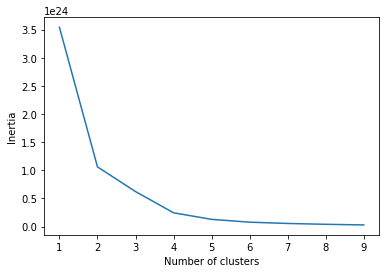

In [38]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [39]:
# Initializing model with K = 5
model = KMeans(n_clusters=5, random_state=5)

# Train the model
model.fit(crypto_data_df)

# Predict clusters
predictions = model.predict(crypto_data_df)

# Create return DataFrame with predicted clusters
crypto_data_df["class"] = model.labels_
crypto_data_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,class
CryptoID,,,,,
42,52,15,4.199995e+01,42,0
404,52,15,1.055185e+09,532000000,0
1337,66,15,2.927942e+10,314159265359,3
BTC,47,12,1.792718e+07,21000000,0
ETH,20,12,1.076842e+08,0,0


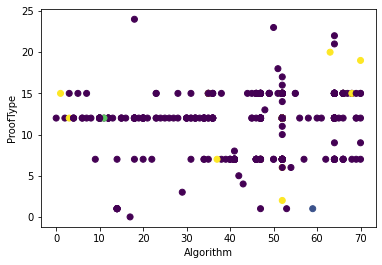

In [40]:
plt.scatter(x=crypto_data_df["Algorithm"], y=crypto_data_df['ProofType'], c=crypto_data_df['class'])
plt.xlabel('Algorithm')
plt.ylabel('ProofType')
plt.show()